# Data Exploration

### Visualization of relationships between variables 

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

In [ ]:
# Load Data
Flow_data = pd.read_csv("WRD_flow_data_feb_2021.csv")
Power_data = pd.read_csv("WRD_power_data_feb_2021.csv")

In [4]:
print('-'*30)
print("Valid X and Y data value Choices")
print('-'*30)

print('-'*30)
print("Flow Data")
print('-'*30)
for col in Flow_data.columns:
    print(col)
print('-'*30)
print("Power Data")
print('-'*30)
for col in Power_data.columns:
    print(col)

# Merge Data into one dataframe for easy plotting
Data = pd.merge(Flow_data,Power_data,how='outer')

------------------------------
Valid X and Y data value Choices
------------------------------
------------------------------
Flow Data
------------------------------
Date Time
UV1_mgd
UV2_mgd
RO_total_feed_flow_gpm
RO_train1_s1_permeate_flow_gpm
RO_train1_s2_permeate_flow_gpm
RO_train1_s3_permeate_flow_gpm
RO_train2_s1_permeate_flow_gpm
RO_train2_s2_permeate_flow_gpm
RO_train2_s3_permeate_flow_gpm
RO_train3_s1_permeate_flow_gpm
RO_train3_s2_permeate_flow_gpm
RO_train3_s3_permeate_flow_gpm
RO_train4_s1_permeate_flow_gpm
RO_train4_s2_permeate_flow_gpm
RO_train4_s3_permeate_flow_gpm
RO_total_permeate_flow_gpm
------------------------------
Power Data
------------------------------
Date Time
UF_pump1_power_kW
UF_pump2_power_kW
UF_pump3_power_kW
UF_pump4_power_kW
PRO_feed_pump1_kW
PRO_feed_pump2_kW
PRO_feed_pump3_kW
PRO_feed_pump4_KW
PRO_interstage_pump1_kW
PRO_interstage_pump2_kW
PRO_interstage_pump3_kW
PRO_interstage_pump4_kW
TSRO_feed_pump1_kW
TSRO_feed_pump2_kW
TSRO_feed_pump3_kW
TSRO_

### Calculating an average value from a day

In [12]:
pressure_data  = pd.read_csv("WRD_pressure_data_march_2021.csv")
# pressure_data['DateTime'] = datetime.strptime(pressure_data['DateTime'], "%Y/%m/%d %H:%M:%S")
pressure_data['DateTime']  = pd.to_datetime(pressure_data['DateTime'] )
print('-'*30)
print("Valid X and Y data value Choices")
print('-'*30)
for col in pressure_data.columns:
    print(col)
print('-'*30)

------------------------------
Valid X and Y data value Choices
------------------------------
DateTime
RO_feed_pressure_psi
Train 1 --->
PRO_feed_pressure_train_1_psi
PRO_IS_pump_suction_pressure_train_1_psi
PRO_IS_pump_discharge_pressure_train_1_psi
PRO_perm_pressure_train_1_psi
PRO_conc_pressure_train_1_psi
TRO_bypass_pressure_train_1_psi
TRO_pump_suction_pressure_train_1_psi
TSRO_feed_pressure_train_1_psi
TRO_conc_pressure_train_1_psi
Train 2  (Data not Populated)--->
PRO_feed_pressure_train_2_psi
PRO_IS_pump_suction_pressure_train_2_psi
PRO_IS_pump_discharge_pressure_train_2_psi
PRO_perm_pressure_train_2_psi
PRO_conc_pressure_train_2_psi
TRO_bypass_pressure_train_2_psi
TRO_pump_suction_pressure_train_2_psi
TSRO_feed_pressure_train_2_psi
TRO_conc_pressure_train_2_psi
Unnamed: 22
Train 3 --->
PRO_conc_pressure_train_3_psi
Train 4 --->
PRO_conc_pressure_train_4_psi
------------------------------


C:\Users\rchurchi\AppData\Local\Temp\1\ipykernel_42320\3022697198.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  pressure_data  = pd.read_csv("WRD_pressure_data_march_2021.csv")


In [24]:
#User Input
day ='2021-03-13'
variables = ["RO_feed_pressure_psi","PRO_feed_pressure_train_1_psi","PRO_IS_pump_suction_pressure_train_1_psi","PRO_IS_pump_discharge_pressure_train_1_psi"]

# Find values
date_stamp = datetime.strptime(day, "%Y-%m-%d")
day_df = pressure_data[pressure_data['DateTime'].between(date_stamp, date_stamp + timedelta(days=1))]
for name in variables:
    day_df.loc[:,name] = pd.to_numeric(day_df.loc[:,name])
    print("\nAverage value of "+name+" on "+ day)
    print((day_df.loc[:,name].mean()))



Average value of RO_feed_pressure_psi on 2021-03-13
35.16408663236655

Average value of PRO_feed_pressure_train_1_psi on 2021-03-13
153.48157176460805

Average value of PRO_IS_pump_suction_pressure_train_1_psi on 2021-03-13
143.51970536453857

Average value of PRO_IS_pump_discharge_pressure_train_1_psi on 2021-03-13
172.54738036995127


# Plotting

In [5]:
# User input to define x and y data
x_data_name = "RO_total_permeate_flow_gpm"
y_data_name_list = ["UV_gpm"]
plot_title = "Total Permeate Flow vs. Total UV Flow"

### Adding Derived Quantities to plot

In [6]:
# Flowrate to both UV units
Data["UV_gpm"] = (Data["UV1_mgd"] + Data["UV2_mgd"]) * 1e6 / 24 / 60

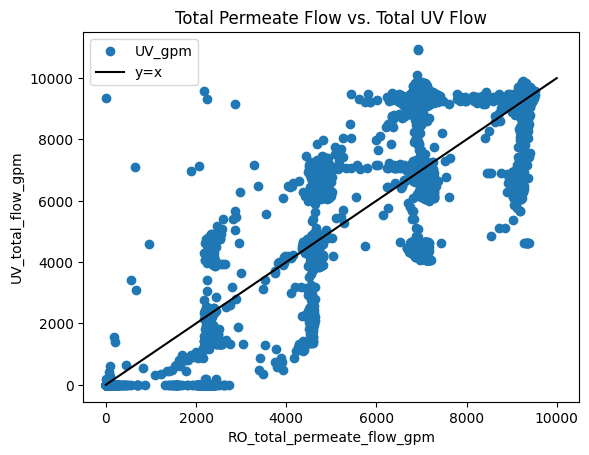

In [7]:
# Create Plot
x_data = Data[x_data_name]
for y_data_name in y_data_name_list:
    y_data = Data[y_data_name]
    figure = plt.plot(x_data,y_data,'o',label=y_data_name)
plt.title(plot_title)
plt.xlabel(x_data_name)

plt.ylabel("UV_total_flow_gpm")
x = np.linspace(0,10000)
plt.plot(x,x,"-k",label="y=x")
#Adjust Axes as needed
# plt.xlim(1400,2700)
# plt.ylim(0,1)
plt.legend(loc='upper left')
#Export Figure
plt.savefig(plot_title+".png")


## Next plot: Specific Energy of RO of a train

In [8]:
# Specific Energy of RO 

# User input to define x and y data
x_data_name = "RO_train1_permeate_flow_gpm"
y_data_name_list = ["SEC_kWh/m3"]
plot_title = "SEC vs. Permeate Flow - Train 1"

# Power from the three pumps / volumetric flowrate of the permeate
Data['RO_train1_permeate_flow_gpm'] = Data['RO_train1_s1_permeate_flow_gpm'] + Data['RO_train1_s2_permeate_flow_gpm'] + Data['RO_train1_s3_permeate_flow_gpm']
Data["SEC_kW/gpm"] = (Data["PRO_feed_pump1_kW"] + Data["PRO_interstage_pump1_kW"] + Data["TSRO_feed_pump1_kW"]) / Data['RO_train1_permeate_flow_gpm']
Data["SEC_kWh/m3"] = Data["SEC_kW/gpm"] * 264 /60

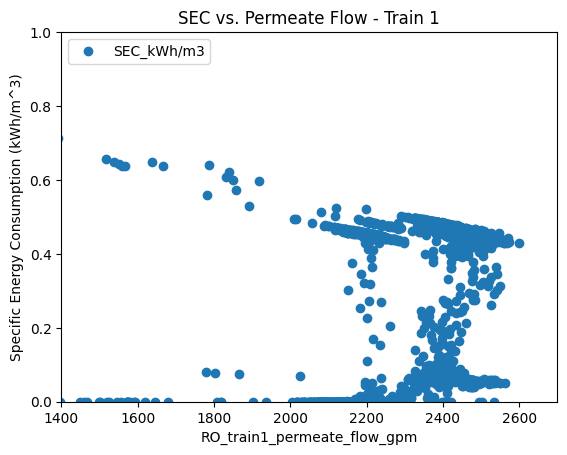

In [9]:
# Create Plot
x_data = Data[x_data_name]
for y_data_name in y_data_name_list:
    y_data = Data[y_data_name]
    figure = plt.plot(x_data,y_data,'o',label=y_data_name)
plt.title(plot_title)
plt.xlabel(x_data_name)

plt.ylabel("Specific Energy Consumption (kWh/m^3)")
#Adjust Axes as needed
plt.xlim(1400,2700)
plt.ylim(0,1)
plt.legend(loc='upper left')
#Export Figure
# plt.savefig(plot_title+".png")


### Feed flow over time

In [10]:
# User input to define x and y data
x_data_name = "Date Time"
y_data_name_list = ["RO_total_feed_flow_gpm"]
plot_title = "Plant Feed vs. Time"

# No derived quantities

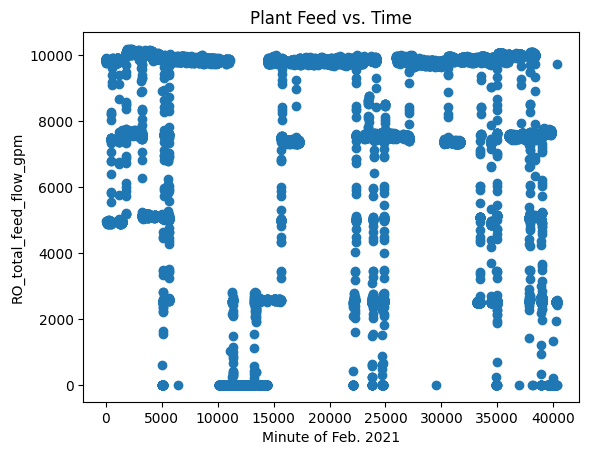

In [15]:
# Create Plot
x_data = Data[x_data_name]
x_data = np.arange(0,len(x_data))
figure,ax = plt.subplots()
for y_data_name in y_data_name_list:
    y_data = Data[y_data_name]
    plt.plot(x_data,y_data,'o',label=y_data_name)
plt.title(plot_title)
plt.xlabel("Minute of Feb. 2021")
# ax.set_xticklabels([])
# plt.autofmt_xdate()
plt.ylabel(y_data_name_list[0])
# Adjust Axes as needed
# plt.xlim(1400,2700)
# plt.ylim(0,1)
# plt.legend(loc='upper left')
#Export Figure
plt.savefig(plot_title+".png")


### Total Power vs. Flowrate

In [16]:
# User input to define x and y data
plot_title = "Plant Power vs. Feed Flowrate"
x_data_name = "RO_total_feed_flow_gpm"
y_data_name_list = ["plant_power_demand_total_kW"]

# No derived quantities

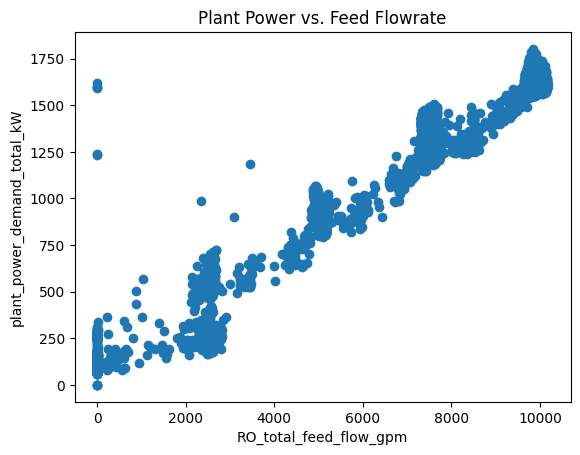

In [18]:
# Create Plot
x_data = Data[x_data_name]
figure,ax = plt.subplots()
for y_data_name in y_data_name_list:
    y_data = Data[y_data_name]
    plt.plot(x_data,y_data,'o',label=y_data_name)
plt.title(plot_title)
plt.xlabel(x_data_name)
plt.ylabel(y_data_name_list[0])
# Adjust Axes as needed
# plt.xlim(1400,2700)
# plt.ylim(0,1)
# plt.legend(loc='upper left')
#Export Figure
plt.savefig(plot_title+".png")

### Pump Efficiency

In [ ]:
# User input to define x and y data
plot_title = "PRO Feed Pump Efficiency vs. Feed Flowrate"
x_data_name = "PRO_feed_pump_effeciency_train1"
y_data_name_list = ["plant_power_demand_total_kW"]

# No derived quantities